In [0]:
import os
from datetime import datetime
from statsmodels.datasets import co2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from fastprogress import progress_bar as pb
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [0]:
pd.plotting.register_matplotlib_converters()

In [0]:
df = co2.load_pandas().data

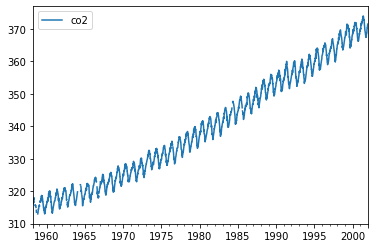

In [159]:
df.plot()

In [0]:
df.fillna(method='ffill', inplace=True)

In [161]:
df.isnull().sum()

co2    0
dtype: int64

In [0]:
for i in range(100):
    df[f'lag{i+1}'] = df['co2'].shift(i+1)

In [163]:
df

,co2,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12,lag13,lag14,lag15,lag16,lag17,lag18,lag19,lag20,lag21,lag22,lag23,lag24,lag25,lag26,lag27,lag28,lag29,lag30,lag31,lag32,lag33,lag34,lag35,lag36,lag37,lag38,lag39,...,lag61,lag62,lag63,lag64,lag65,lag66,lag67,lag68,lag69,lag70,lag71,lag72,lag73,lag74,lag75,lag76,lag77,lag78,lag79,lag80,lag81,lag82,lag83,lag84,lag85,lag86,lag87,lag88,lag89,lag90,lag91,lag92,lag93,lag94,lag95,lag96,lag97,lag98,lag99,lag100
1958-03-29,316.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1958-04-05,317.3,316.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1958-04-12,317.6,317.3,316.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1958-04-19,317.5,317.6,317.3,316.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1958-04-26,316.4,317.5,317.6,317.3,316.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001-12-01,370.3,370.3,369.7,368.8,368.7,368.7,368.1,367.6,367.8,367.4,367.4,368.0,368.2,368.4,369.0,369.3,369.5,369.9,370.6,371.2,371.3,372.1,372.7,372.9,372.8,373.1,373.8,373.9,373.7,373.9,373.7,372.7,373.0,372.7,372.7,372.0,371.8,372.1,372.2,372.2,...,366.4,366.2,366.2,366.7,367.2,367.1,367.7,368.3,368.7,369.0,369.7,370.2,370.0,370.8,371.3,371.7,371.6,371.9,371.8,371.9,371.7,371.2,371.3,372.0,371.8,371.7,370.9,370.7,370.9,370.0,370.0,369.5,369.3,369.6,369.1,369.2,369.8,369.0,368.5,368.6
2001-12-08,370.8,370.3,370.3,369.7,368.8,368.7,368.7,368.1,367.6,367.8,367.4,367.4,368.0,368.2,368.4,369.0,369.3,369.5,369.9,370.6,371.2,371.3,372.1,372.7,372.9,372.8,373.1,373.8,373.9,373.7,373.9,373.7,372.7,373.0,372.7,372.7,372.0,371.8,372.1,372.2,...,366.3,366.4,366.2,366.2,366.7,367.2,367.1,367.7,368.3,368.7,369.0,369.7,370.2,370.0,370.8,371.3,371.7,371.6,371.9,371.8,371.9,371.7,371.2,371.3,372.0,371.8,371.7,370.9,370.7,370.9,370.0,370.0,369.5,369.3,369.6,369.1,369.2,369.8,369.0,368.5
2001-12-15,371.2,370.8,370.3,370.3,369.7,368.8,368.7,368.7,368.1,367.6,367.8,367.4,367.4,368.0,368.2,368.4,369.0,369.3,369.5,369.9,370.6,371.2,371.3,372.1,372.7,372.9,372.8,373.1,373.8,373.9,373.7,373.9,373.7,372.7,373.0,372.7,372.7,372.0,371.8,372.1,...,366.6,366.3,366.4,366.2,366.2,366.7,367.2,367.1,367.7,368.3,368.7,369.0,369.7,370.2,370.0,370.8,371.3,371.7,371.6,371.9,371.8,371.9,371.7,371.2,371.3,372.0,371.8,371.7,370.9,370.7,370.9,370.0,370.0,369.5,369.3,369.6,369.1,369.2,369.8,369.0
2001-12

In [0]:
df.dropna(how='any', inplace=True)

In [0]:
df['max'] = df.max(axis=1)
df['min'] = df.min(axis=1)

In [0]:
df_train = df[:'1990-01-01']
df_test = df['1990-01-01':]

In [167]:
df_train

,co2,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12,lag13,lag14,lag15,lag16,lag17,lag18,lag19,lag20,lag21,lag22,lag23,lag24,lag25,lag26,lag27,lag28,lag29,lag30,lag31,lag32,lag33,lag34,lag35,lag36,lag37,lag38,lag39,...,lag63,lag64,lag65,lag66,lag67,lag68,lag69,lag70,lag71,lag72,lag73,lag74,lag75,lag76,lag77,lag78,lag79,lag80,lag81,lag82,lag83,lag84,lag85,lag86,lag87,lag88,lag89,lag90,lag91,lag92,lag93,lag94,lag95,lag96,lag97,lag98,lag99,lag100,max,min
1960-02-27,317.0,317.4,316.9,316.6,316.6,316.5,316.7,316.4,315.7,315.7,315.8,315.6,315.0,315.1,315.2,314.8,314.4,314.1,313.4,313.4,313.1,313.0,313.5,313.5,313.9,314.4,314.1,315.0,314.9,314.9,315.6,316.1,316.4,316.8,316.8,317.7,317.8,318.1,318.5,318.4,...,314.4,314.5,314.0,313.5,313.2,313.0,313.5,313.5,313.5,313.5,313.5,313.5,313.5,313.5,313.5,314.1,315.0,315.0,315.1,315.6,315.5,315.4,315.8,315.8,317.9,317.9,317.9,317.9,317.9,317.9,317.5,316.9,316.9,316.4,317.5,317.6,317.3,316.1,318.7,313.0
1960-03-05,316.9,317.0,317.4,316.9,316.6,316.6,316.5,316.7,316.4,315.7,315.7,315.8,315.6,315.0,315.1,315.2,314.8,314.4,314.1,313.4,313.4,313.1,313.0,313.5,313.5,313.9,314.4,314.1,315.0,314.9,314.9,315.6,316.1,316.4,316.8,316.8,317.7,317.8,318.1,318.5,...,314.7,314.4,314.5,314.0,313.5,313.2,313.0,313.5,313.5,313.5,313.5,313.5,313.5,313.5,313.5,313.5,314.1,315.0,315.0,315.1,315.6,315.5,315.4,315.8,315.8,317.9,317.9,317.9,317.9,317.9,317.9,317.5,316.9,316.9,316.4,317.5,317.6,317.3,318.7,313.0
1960-03-12,317.7,316.9,317.0,317.4,316.9,316.6,316.6,316.5,316.7,316.4,315.7,315.7,315.8,315.6,315.0,315.1,315.2,314.8,314.4,314.1,313.4,313.4,313.1,313.0,313.5,313.5,313.9,314.4,314.1,315.0,314.9,314.9,315.6,316.1,316.4,316.8,316.8,317.7,317.8,318.1,...,315.2,314.7,314.4,314.5,314.0,313.5,313.2,313.0,313.5,313.5,313.5,313.5,313.5,313.5,313.5,313.5,313.5,314.1,315.0,315.0,315.1,315.6,315.5,315.4,315.8,315.8,317.9,317.9,317.9,317.9,317.9,317.9,317.5,316.9,316.9,316.4,317.5,317.6,318.7,313.0
1960-03-19,318.0,317.7,316.9,317.0,317.4,316.9,316.6,316.6,316.5,316.7,316.4,315.7,315.7,315.8,315.6,315.0,315.1,315.2,314.8,314.4,314.1,313.4,313.4,313.1,313.0,313.5,313.5,313.9,314.4,314.1,315.0,314.9,314.9,315.6,316.1,316.4,316.8,316.8,317.7,317.8,...,315.2,315.2,314.7,314.4,314.5,314.0,313.5,313.2,313.0,313.5,313.5,313.5,313.5,313.5,313.5,313.5,313.5,313.5,314.1,315.0,315.0,315.1,315.6,315.5,315.4,315.8,315.8,317.9,317.9,317.9,317.9,317.9,317.9,317.5,316.9,316.9,316.4,317.5,318.7,313.0
1960-03-26,317.7,318.0,317.7,316.9,317.0,317.4,316.9,316.6,316.6,316.5,316.7,316.4,315.7,315.7,315.8,315.6,315.0,315.1,315.2,314.8,314.4,314.1,313.4,313.4,313.1,313.0,313.5,313.5,313.9,314.4,314.1,315.0,314.9,314.9,315.6,316.1,316.4,316.8,316.8,317.7,...,315.5,315.2,315.2,314.7,314.4,314.5,314.0,313.5,313.2,313.0,313.5,313.5,313.5,313.5,313.5,313.5,313.5,313.5,313.5,314.1,315.0,315.0,315.1,315.6,315.5,315.4,315.8,315.8,317.9,317.9,317.9,317.9,317.9,317.9,317.5,316.9,316.9,316.4,318.7,313.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989-12-02,352.0,351.4,351.6,351.2,350.6,350.4,350.2,349.7,349.9,349.7,349.3,349.4,350.2,350.7,350.4,351.1,352.2,352.6,353.2,353.1,353.8,354.7,354.5,354.9,354.8,355.0,355.8,355.7,355.6,355.8,355.3,355.9,356.0,355.4,355.0,354.5,354.4,353.5,353.4,353.1,...,348.9,348.7,349.3,349.6,350.4,350.3,350.9,351.1,351.9,352.6,352.5,353.0,353.1,353.6,354.2,354.1,354.2,354.5,354.3,353.7,354.2,354.0,353.1,353.5,353.1,352.2,351.7,351.8,352.8,352.5,351.5,351.3,351.8,351.2,350.7,350.2,350.2,349.7,356.0,348.1
1989-12-09,352.1,352.0,351.4,351.6,351.2,350.6,350.4,350.2,349.7,349.9,349.7,349.3,349.4,350.2,350.7,350.4,351.1,352.2,352.6,353.2,353.1,353.8,354.7,354.5,354.9,354.8,355.0,355.8,355.7,355.6,355.8,355.3,355.9,356.0,355.4,355.0,354.

In [168]:
df_test

,co2,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12,lag13,lag14,lag15,lag16,lag17,lag18,lag19,lag20,lag21,lag22,lag23,lag24,lag25,lag26,lag27,lag28,lag29,lag30,lag31,lag32,lag33,lag34,lag35,lag36,lag37,lag38,lag39,...,lag63,lag64,lag65,lag66,lag67,lag68,lag69,lag70,lag71,lag72,lag73,lag74,lag75,lag76,lag77,lag78,lag79,lag80,lag81,lag82,lag83,lag84,lag85,lag86,lag87,lag88,lag89,lag90,lag91,lag92,lag93,lag94,lag95,lag96,lag97,lag98,lag99,lag100,max,min
1990-01-06,353.4,353.4,352.5,352.4,352.1,352.0,351.4,351.6,351.2,350.6,350.4,350.2,349.7,349.9,349.7,349.3,349.4,350.2,350.7,350.4,351.1,352.2,352.6,353.2,353.1,353.8,354.7,354.5,354.9,354.8,355.0,355.8,355.7,355.6,355.8,355.3,355.9,356.0,355.4,355.0,...,349.4,348.6,348.8,348.8,348.1,348.9,348.7,349.3,349.6,350.4,350.3,350.9,351.1,351.9,352.6,352.5,353.0,353.1,353.6,354.2,354.1,354.2,354.5,354.3,353.7,354.2,354.0,353.1,353.5,353.1,352.2,351.7,351.8,352.8,352.5,351.5,351.3,351.8,356.0,348.1
1990-01-13,353.5,353.4,353.4,352.5,352.4,352.1,352.0,351.4,351.6,351.2,350.6,350.4,350.2,349.7,349.9,349.7,349.3,349.4,350.2,350.7,350.4,351.1,352.2,352.6,353.2,353.1,353.8,354.7,354.5,354.9,354.8,355.0,355.8,355.7,355.6,355.8,355.3,355.9,356.0,355.4,...,349.2,349.4,348.6,348.8,348.8,348.1,348.9,348.7,349.3,349.6,350.4,350.3,350.9,351.1,351.9,352.6,352.5,353.0,353.1,353.6,354.2,354.1,354.2,354.5,354.3,353.7,354.2,354.0,353.1,353.5,353.1,352.2,351.7,351.8,352.8,352.5,351.5,351.3,356.0,348.1
1990-01-20,353.8,353.5,353.4,353.4,352.5,352.4,352.1,352.0,351.4,351.6,351.2,350.6,350.4,350.2,349.7,349.9,349.7,349.3,349.4,350.2,350.7,350.4,351.1,352.2,352.6,353.2,353.1,353.8,354.7,354.5,354.9,354.8,355.0,355.8,355.7,355.6,355.8,355.3,355.9,356.0,...,349.7,349.2,349.4,348.6,348.8,348.8,348.1,348.9,348.7,349.3,349.6,350.4,350.3,350.9,351.1,351.9,352.6,352.5,353.0,353.1,353.6,354.2,354.1,354.2,354.5,354.3,353.7,354.2,354.0,353.1,353.5,353.1,352.2,351.7,351.8,352.8,352.5,351.5,356.0,348.1
1990-01-27,353.9,353.8,353.5,353.4,353.4,352.5,352.4,352.1,352.0,351.4,351.6,351.2,350.6,350.4,350.2,349.7,349.9,349.7,349.3,349.4,350.2,350.7,350.4,351.1,352.2,352.6,353.2,353.1,353.8,354.7,354.5,354.9,354.8,355.0,355.8,355.7,355.6,355.8,355.3,355.9,...,349.8,349.7,349.2,349.4,348.6,348.8,348.8,348.1,348.9,348.7,349.3,349.6,350.4,350.3,350.9,351.1,351.9,352.6,352.5,353.0,353.1,353.6,354.2,354.1,354.2,354.5,354.3,353.7,354.2,354.0,353.1,353.5,353.1,352.2,351.7,351.8,352.8,352.5,356.0,348.1
1990-02-03,354.1,353.9,353.8,353.5,353.4,353.4,352.5,352.4,352.1,352.0,351.4,351.6,351.2,350.6,350.4,350.2,349.7,349.9,349.7,349.3,349.4,350.2,350.7,350.4,351.1,352.2,352.6,353.2,353.1,353.8,354.7,354.5,354.9,354.8,355.0,355.8,355.7,355.6,355.8,355.3,...,350.1,349.8,349.7,349.2,349.4,348.6,348.8,348.8,348.1,348.9,348.7,349.3,349.6,350.4,350.3,350.9,351.1,351.9,352.6,352.5,353.0,353.1,353.6,354.2,354.1,354.2,354.5,354.3,353.7,354.2,354.0,353.1,353.5,353.1,352.2,351.7,351.8,352.8,356.0,348.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001-12-01,370.3,370.3,369.7,368.8,368.7,368.7,368.1,367.6,367.8,367.4,367.4,368.0,368.2,368.4,369.0,369.3,369.5,369.9,370.6,371.2,371.3,372.1,372.7,372.9,372.8,373.1,373.8,373.9,373.7,373.9,373.7,372.7,373.0,372.7,372.7,372.0,371.8,372.1,372.2,372.2,...,366.2,366.7,367.2,367.1,367.7,368.3,368.7,369.0,369.7,370.2,370.0,370.8,371.3,371.7,371.6,371.9,371.8,371.9,371.7,371.2,371.3,372.0,371.8,371.7,370.9,370.7,370.9,370.0,370.0,369.5,369.3,369.6,369.1,369.2,369.8,369.0,368.5,368.6,373.9,366.2
2001-12-08,370.8,370.3,370.3,369.7,368.8,368.7,368.7,368.1,367.6,367.8,367.4,367.4,368.0,368.2,368.4,369.0,369.3,369.5,369.9,370.6,371.2,371.3,372.1,372.7,372.9,372.8,373.1,373.8,373.9,373.7,373.9,373.7,372.7,373.0,372.7,372.7,372.

In [0]:
for j in pb(range(2, 100)):
    feat_names = [f'lag{i+1}' for i in range(j)]

    df_train_x = df_train[feat_names]
    df_train_y = df_train[['co2']]

    df_test_x = df_test[feat_names]
    df_test_y = df_test[['co2']]

    rf_reg = RandomForestRegressor(
        n_estimators=100,
        criterion='mse',
        random_state=42,
    )

    rf_reg.fit(df_train_x, df_train_y)

    pred = rf_reg.predict(df_test_x)

    df_test[f'pred_lag{j}'] = pred

In [170]:
df_test

,co2,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12,lag13,lag14,lag15,lag16,lag17,lag18,lag19,lag20,lag21,lag22,lag23,lag24,lag25,lag26,lag27,lag28,lag29,lag30,lag31,lag32,lag33,lag34,lag35,lag36,lag37,lag38,lag39,...,pred_lag60,pred_lag61,pred_lag62,pred_lag63,pred_lag64,pred_lag65,pred_lag66,pred_lag67,pred_lag68,pred_lag69,pred_lag70,pred_lag71,pred_lag72,pred_lag73,pred_lag74,pred_lag75,pred_lag76,pred_lag77,pred_lag78,pred_lag79,pred_lag80,pred_lag81,pred_lag82,pred_lag83,pred_lag84,pred_lag85,pred_lag86,pred_lag87,pred_lag88,pred_lag89,pred_lag90,pred_lag91,pred_lag92,pred_lag93,pred_lag94,pred_lag95,pred_lag96,pred_lag97,pred_lag98,pred_lag99
1990-01-06,353.4,353.4,352.5,352.4,352.1,352.0,351.4,351.6,351.2,350.6,350.4,350.2,349.7,349.9,349.7,349.3,349.4,350.2,350.7,350.4,351.1,352.2,352.6,353.2,353.1,353.8,354.7,354.5,354.9,354.8,355.0,355.8,355.7,355.6,355.8,355.3,355.9,356.0,355.4,355.0,...,353.358,353.359,353.335,353.317,353.323,353.285,353.347,353.341,353.305,353.309,353.312,353.352,353.347,353.378,353.259,353.371,353.327,353.382,353.330,353.366,353.326,353.322,353.347,353.359,353.376,353.336,353.337,353.347,353.324,353.363,353.338,353.356,353.353,353.357,353.309,353.352,353.366,353.335,353.307,353.319
1990-01-13,353.5,353.4,353.4,352.5,352.4,352.1,352.0,351.4,351.6,351.2,350.6,350.4,350.2,349.7,349.9,349.7,349.3,349.4,350.2,350.7,350.4,351.1,352.2,352.6,353.2,353.1,353.8,354.7,354.5,354.9,354.8,355.0,355.8,355.7,355.6,355.8,355.3,355.9,356.0,355.4,...,353.409,353.444,353.406,353.388,353.376,353.373,353.429,353.425,353.389,353.373,353.408,353.420,353.397,353.419,353.398,353.415,353.404,353.423,353.361,353.428,353.443,353.407,353.416,353.426,353.445,353.392,353.397,353.405,353.382,353.468,353.449,353.409,353.425,353.405,353.411,353.404,353.448,353.413,353.391,353.396
1990-01-20,353.8,353.5,353.4,353.4,352.5,352.4,352.1,352.0,351.4,351.6,351.2,350.6,350.4,350.2,349.7,349.9,349.7,349.3,349.4,350.2,350.7,350.4,351.1,352.2,352.6,353.2,353.1,353.8,354.7,354.5,354.9,354.8,355.0,355.8,355.7,355.6,355.8,355.3,355.9,356.0,...,353.587,353.565,353.532,353.600,353.556,353.531,353.551,353.555,353.565,353.553,353.580,353.590,353.563,353.621,353.529,353.602,353.579,353.637,353.595,353.563,353.502,353.548,353.589,353.578,353.599,353.592,353.561,353.528,353.621,353.595,353.562,353.564,353.580,353.561,353.552,353.558,353.583,353.545,353.601,353.544
1990-01-27,353.9,353.8,353.5,353.4,353.4,352.5,352.4,352.1,352.0,351.4,351.6,351.2,350.6,350.4,350.2,349.7,349.9,349.7,349.3,349.4,350.2,350.7,350.4,351.1,352.2,352.6,353.2,353.1,353.8,354.7,354.5,354.9,354.8,355.0,355.8,355.7,355.6,355.8,355.3,355.9,...,353.799,353.795,353.790,353.784,353.788,353.746,353.788,353.757,353.785,353.718,353.763,353.806,353.795,353.787,353.744,353.766,353.745,353.829,353.741,353.779,353.807,353.762,353.728,353.834,353.763,353.755,353.754,353.763,353.731,353.854,353.818,353.801,353.832,353.804,353.849,353.727,353.812,353.739,353.789,353.829
1990-02-03,354.1,353.9,353.8,353.5,353.4,353.4,352.5,352.4,352.1,352.0,351.4,351.6,351.2,350.6,350.4,350.2,349.7,349.9,349.7,349.3,349.4,350.2,350.7,350.4,351.1,352.2,352.6,353.2,353.1,353.8,354.7,354.5,354.9,354.8,355.0,355.8,355.7,355.6,355.8,355.3,...,353.998,354.052,353.996,354.040,354.036,354.031,353.971,354.009,354.016,353.957,354.066,353.993,354.029,354.066,353.975,353.984,354.025,354.056,353.996,354.009,354.030,353.971,353.952,354.028,353.976,354.034,353.953,353.964,354.039,354.091,354.058,354.010,354.011,354.021,354.023,354.002,353.989,353.990,354.021,354.044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001-12-01,370.3,370.3,369.7,368.8,368.7,368.7,368.1,367.6,367.8,367.4,367.4,368.0,368.2,368.4,369.0,369.3,369.5,369.9,370.

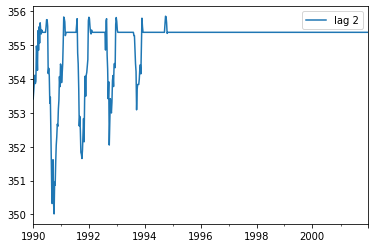

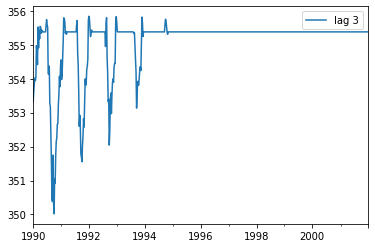

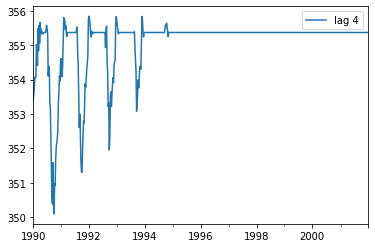

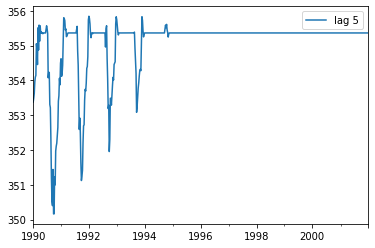

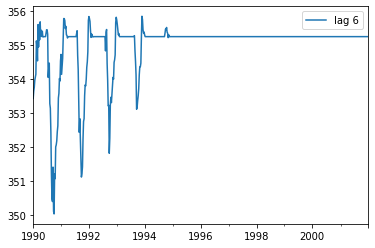

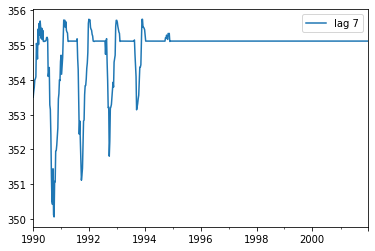

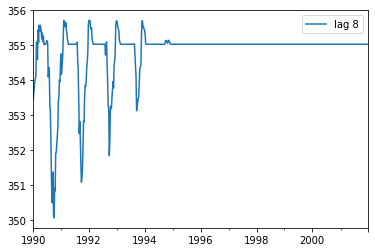

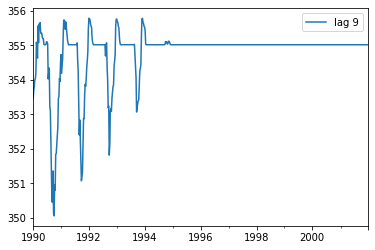

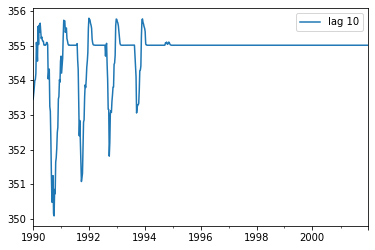

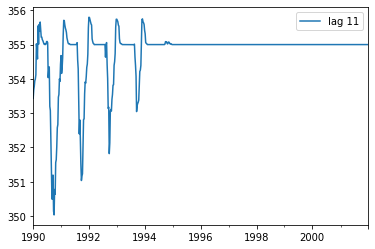

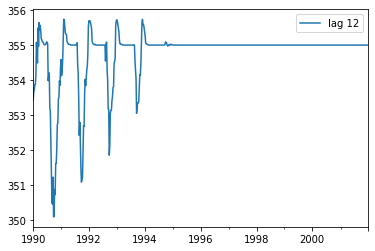

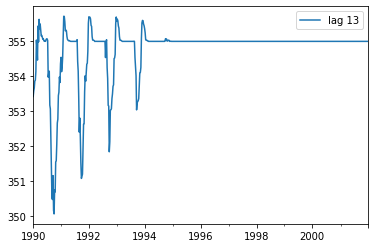

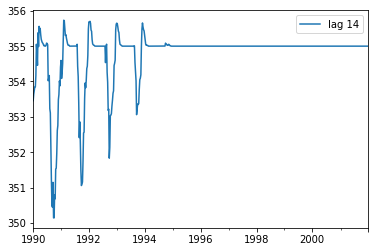

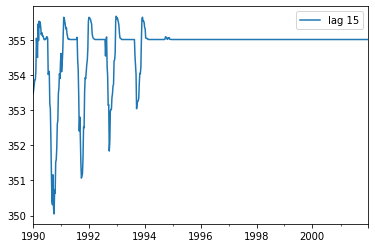

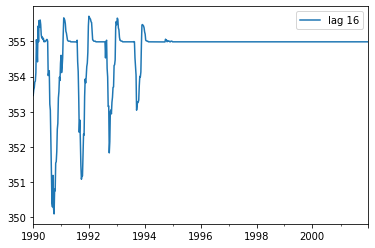

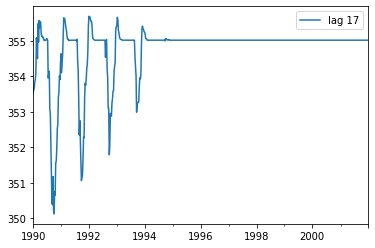

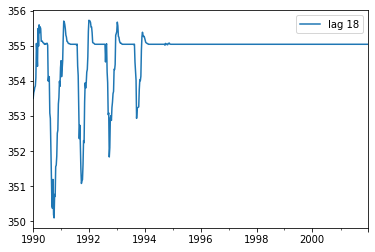

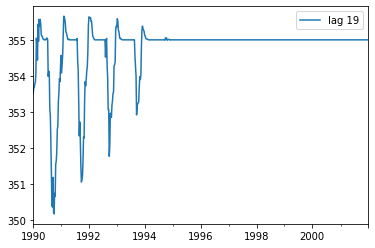

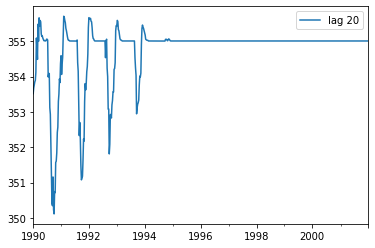

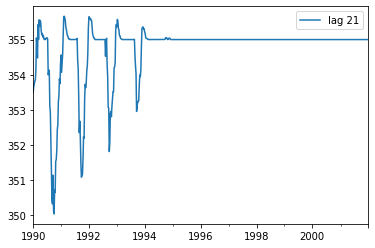

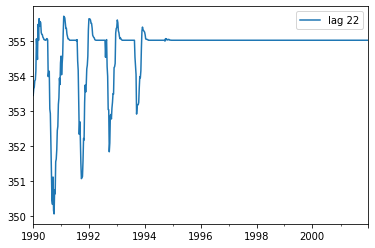

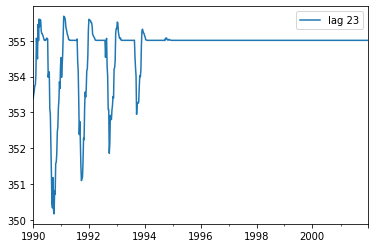

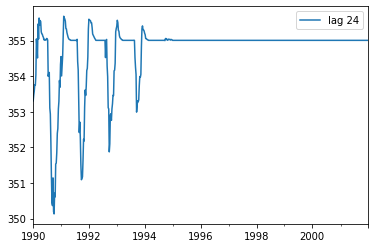

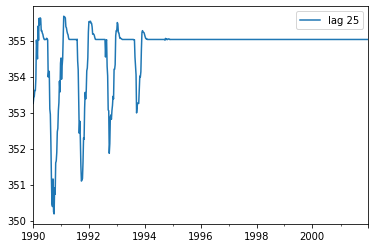

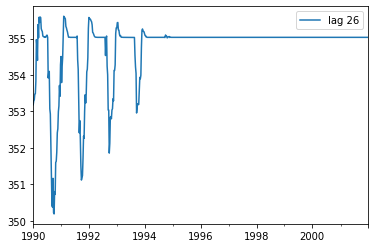

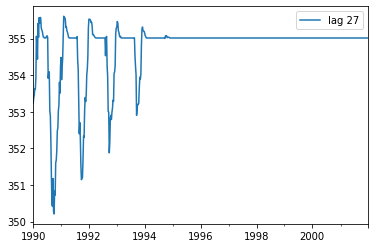

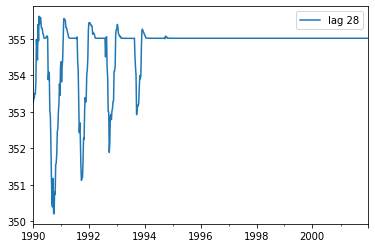

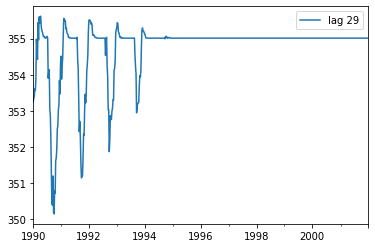

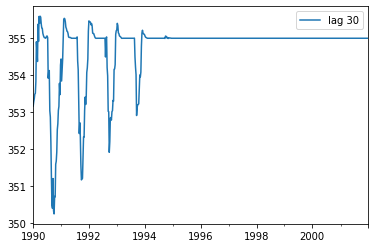

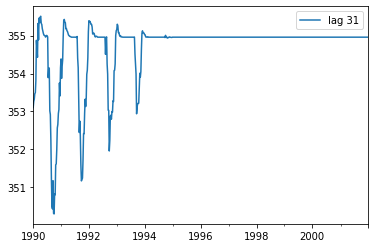

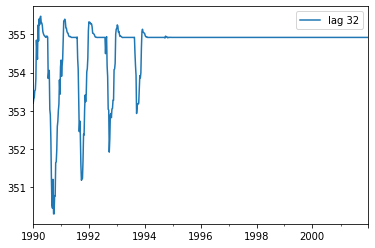

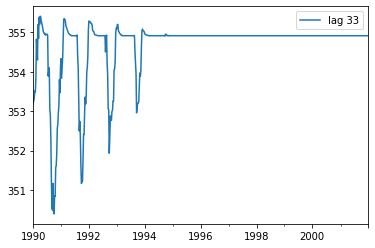

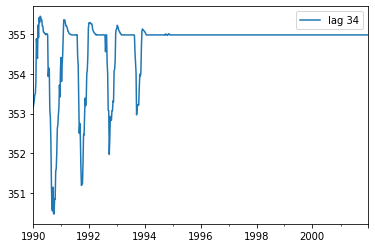

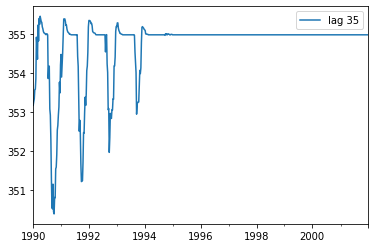

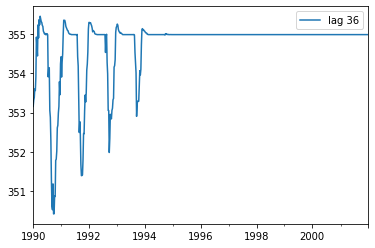

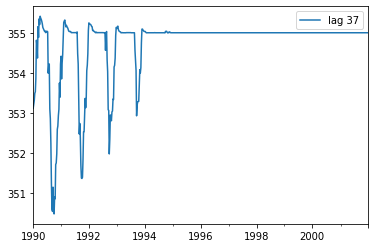

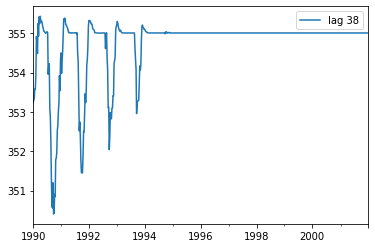

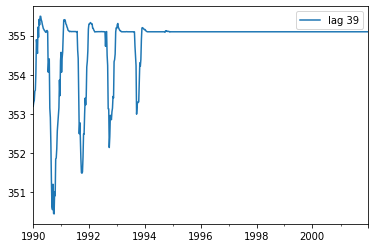

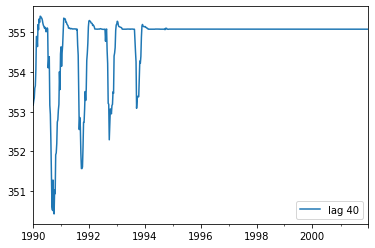

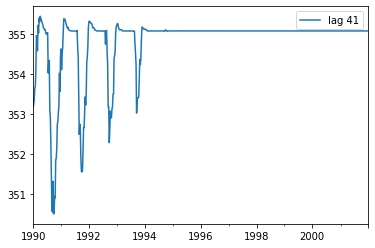

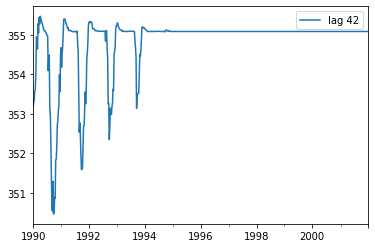

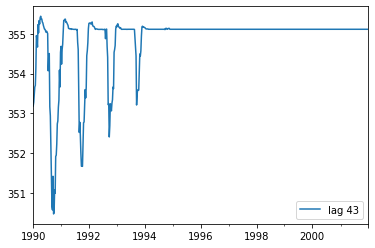

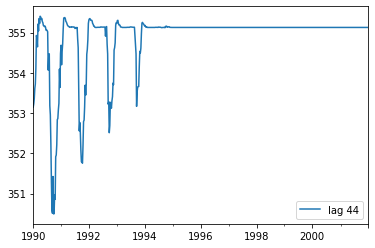

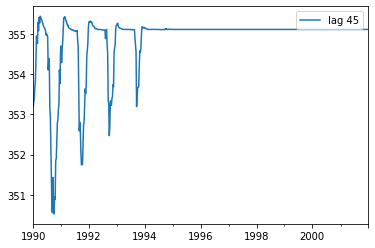

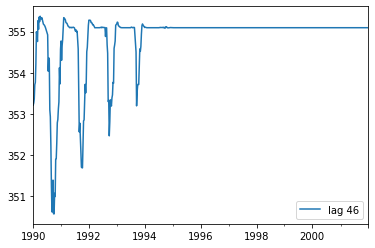

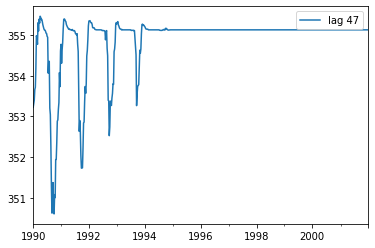

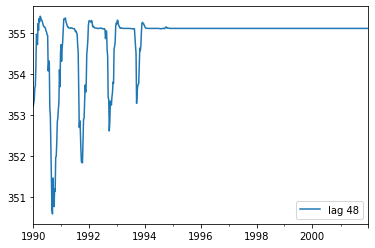

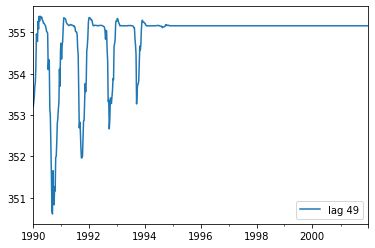

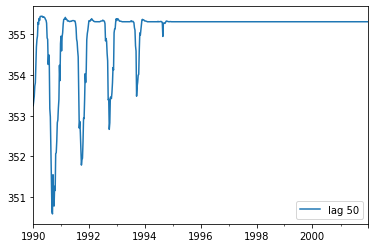

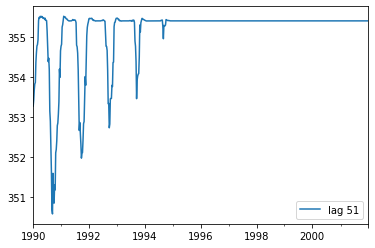

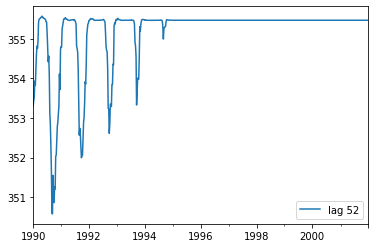

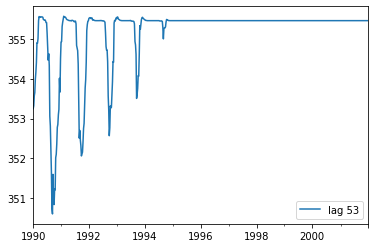

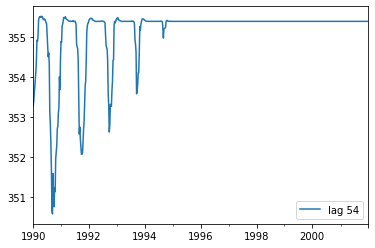

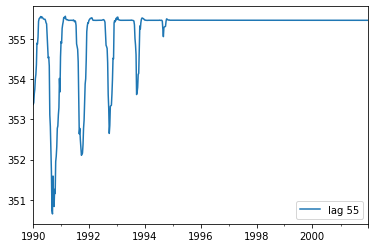

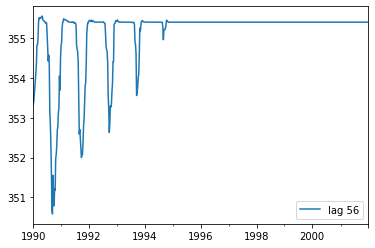

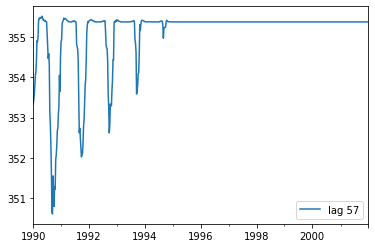

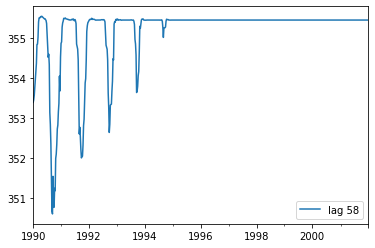

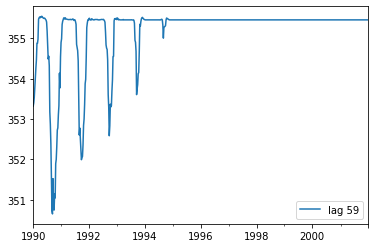

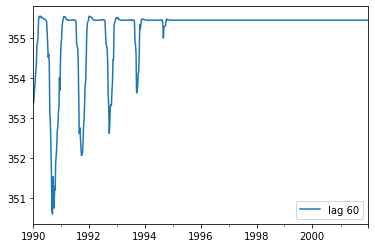

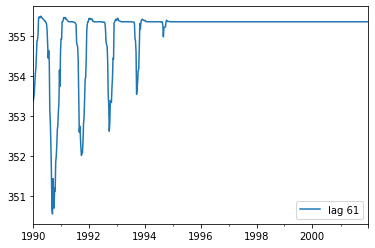

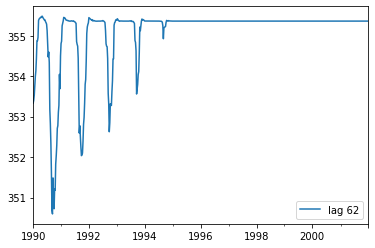

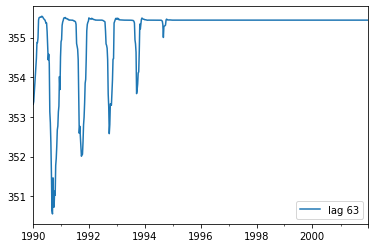

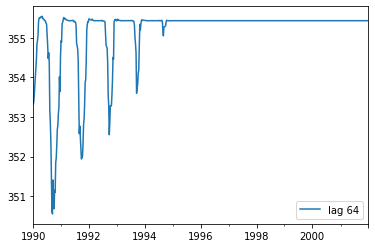

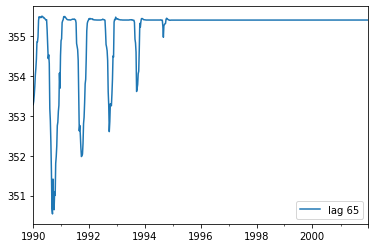

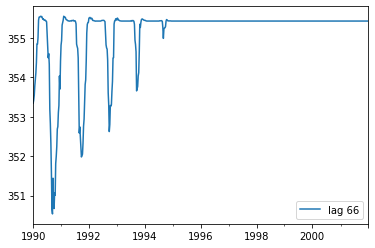

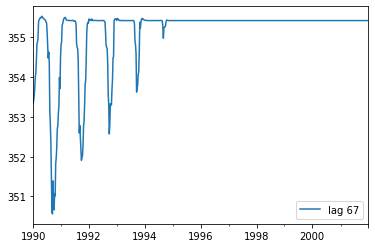

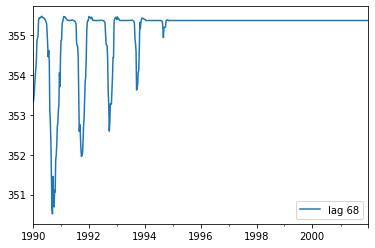

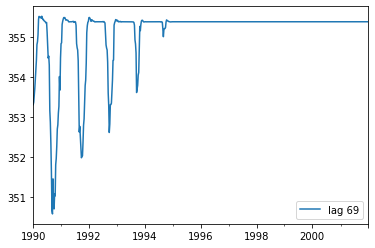

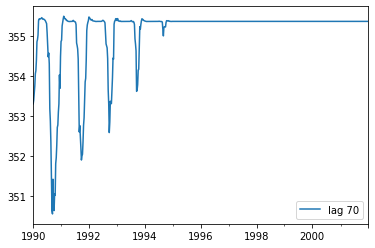

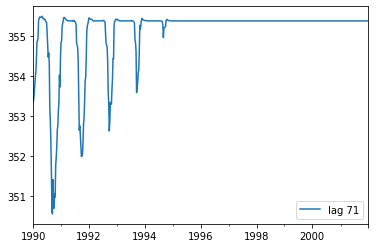

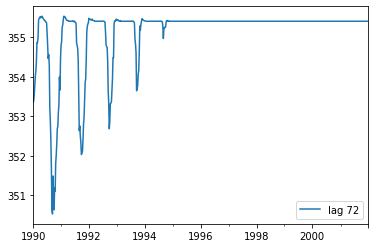

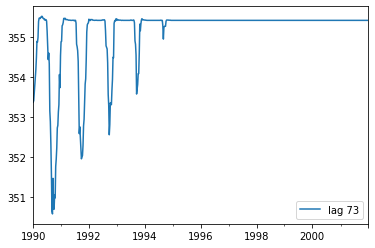

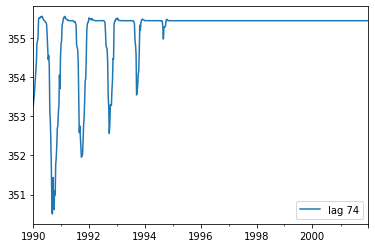

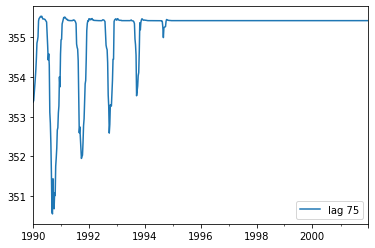

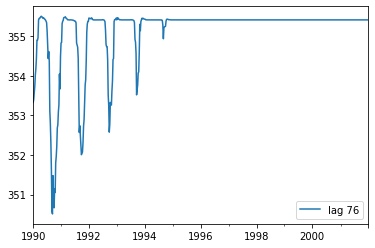

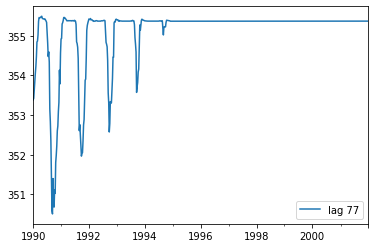

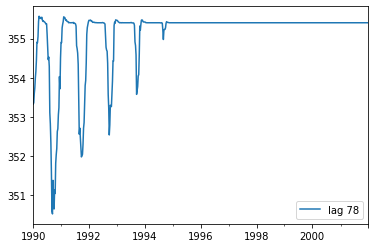

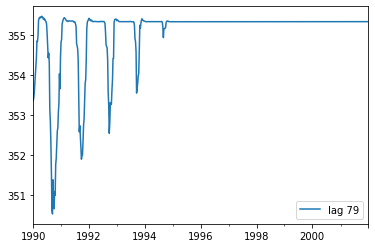

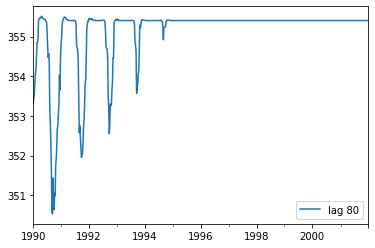

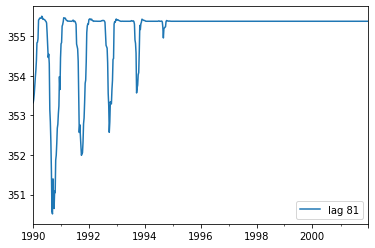

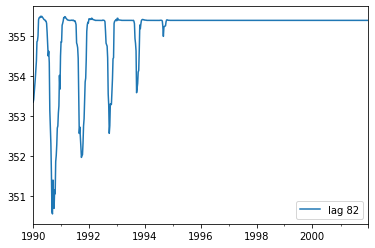

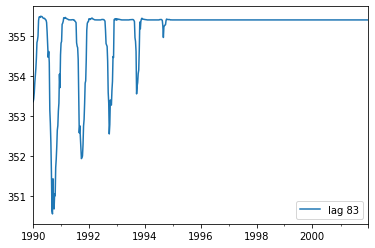

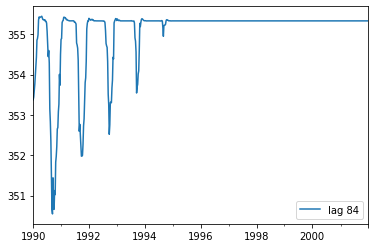

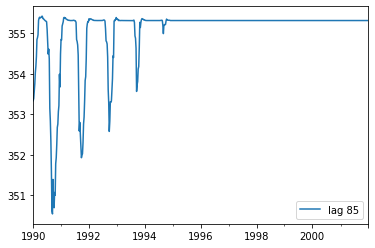

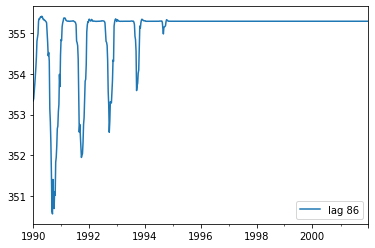

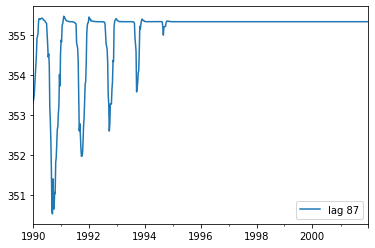

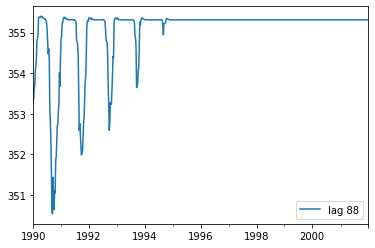

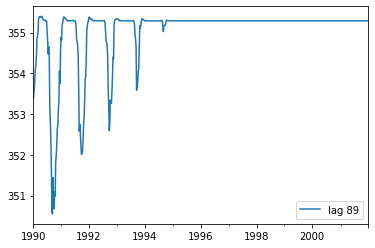

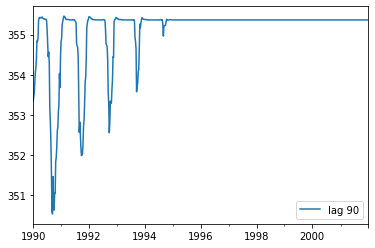

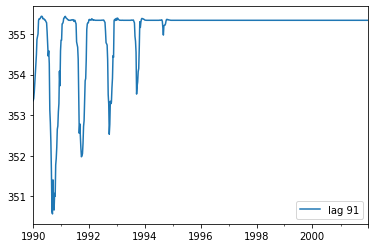

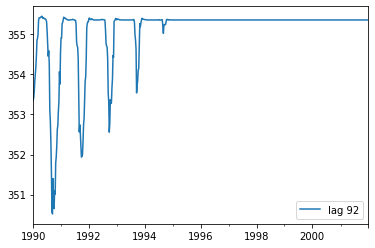

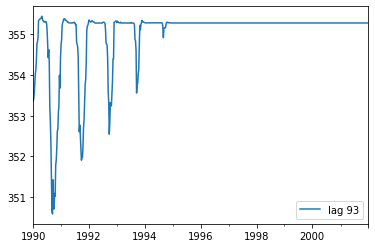

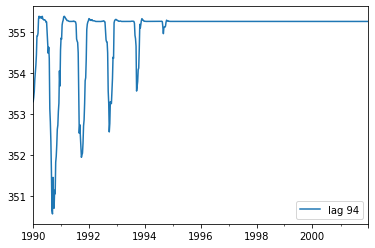

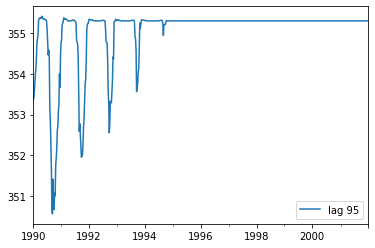

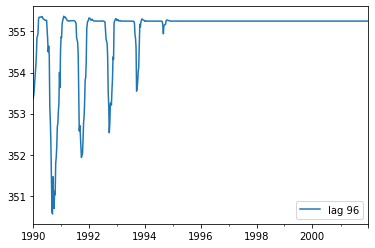

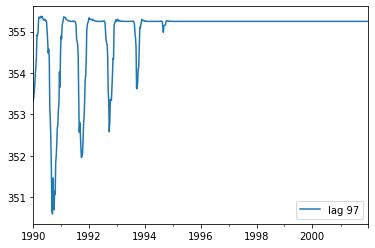

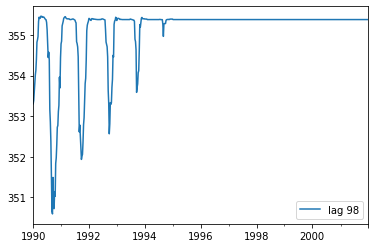

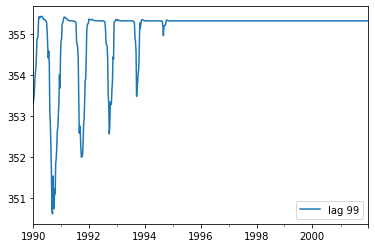

In [173]:
for i in range(2, 100):
    df_test[f'pred_lag{i}'].plot(label=f'lag {i}')
    plt.legend()
    plt.show()

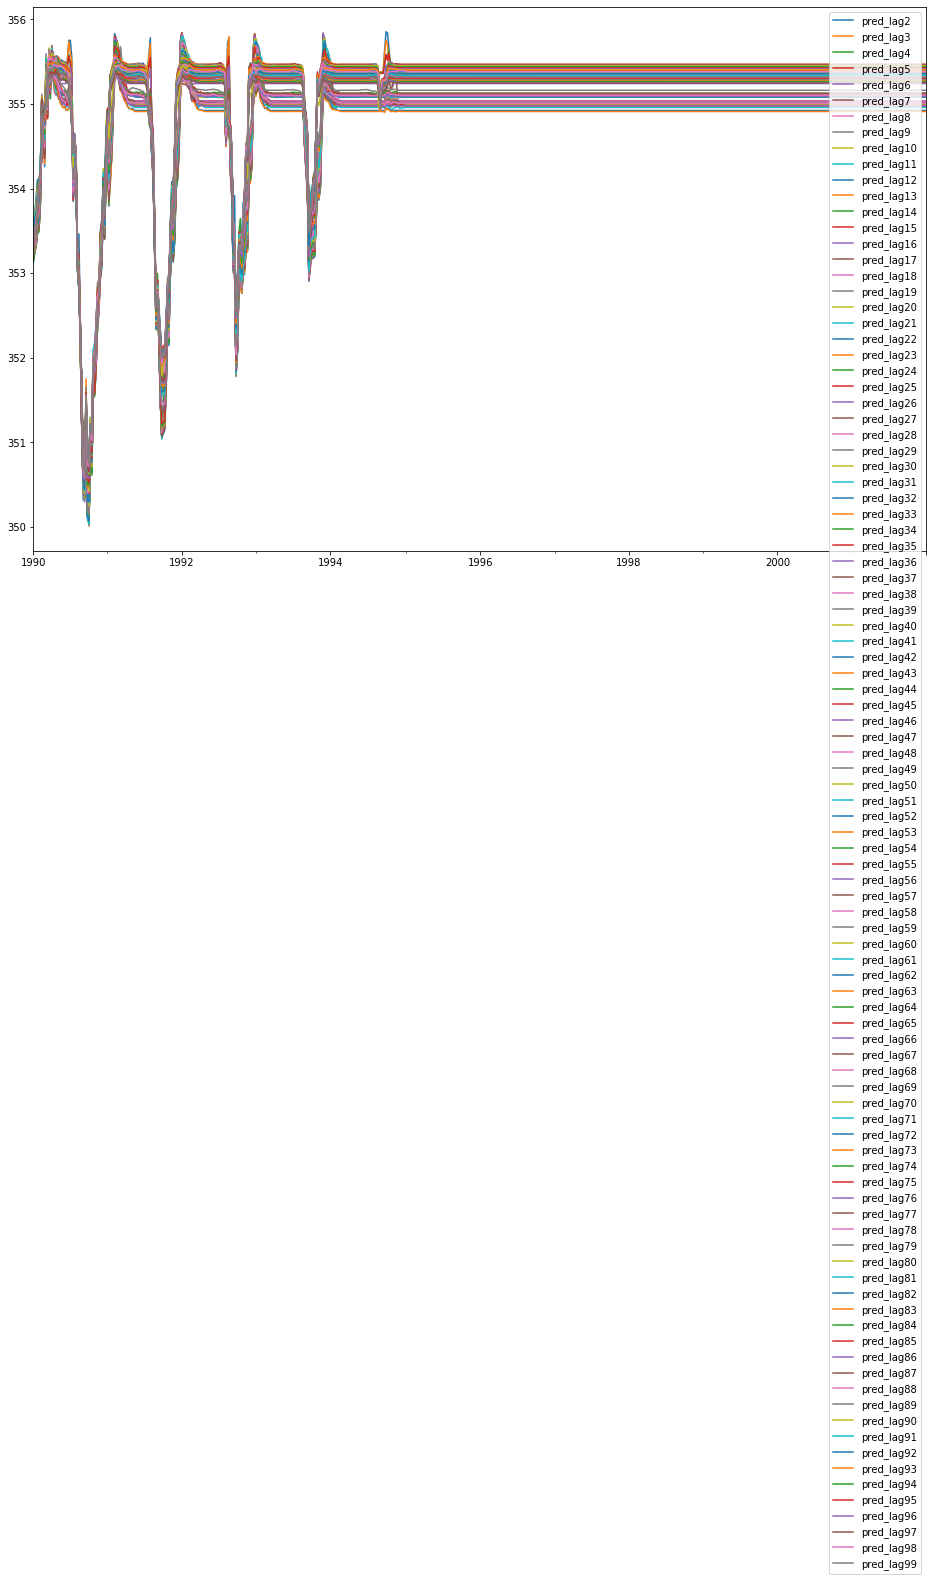

In [177]:
df_test[[f'pred_lag{i}' for i in range(2, 100)]].plot(figsize=(16, 10))